<a href="https://colab.research.google.com/github/lbraun6/SE-FJC_Analysis_Pipeline/blob/main/Hannah's_FJC%2B_and_SE_score_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install scikit_posthocs package
!pip install scikit_posthocs

# Import statements
from google.colab import files # For uploading files to Google Colab
import pandas as pd # For data structures called dataframes and functions to manipulate them
import numpy as np # For general mathematical functons
import scipy.stats as stats # For functions to run statistical tests
import scikit_posthocs as sp # For specific post-hoc statistical tests
import matplotlib as mpl # Basic plotting objects
import matplotlib.pyplot as plt # Basic plotting functions
import seaborn as sns # More advanced/customizable plotting functions

In [ ]:
# Load dataset into Google Colab, read into a dataframe, and view
uploaded = files.upload() # Prompts you to select your excel file
df = pd.read_excel("Fall 2026 Indep. Study Neocortex and Hipp. Quantification-2") # Reads the excel file into a dataframe
status_df = pd.read_excel("Average SE and FJC+ Data.xlsx")
print(df) # Shows your dataframe

Saving Average SE and FJC+ Data.xlsx to Average SE and FJC+ Data.xlsx
    Mouse Number Genotype     Sex  Average Status Epilepticus Score  \
0            680       WT  Female                             2.500   
1            704       WT    Male                             2.500   
2            705       WT  Female                             2.750   
3            710       WT  Female                             2.375   
4            803       WT  Female                             3.250   
5            809       WT    Male                             2.750   
6            812       WT    Male                             2.250   
7            813       WT    Male                             2.625   
8            470       WT    Male                             2.800   
9            471       WT    Male                             3.300   
10           481       WT    Male                             2.500   
11           678      HET    Male                             2.800   
12     

In [ ]:
# Preprocess/clean data
clean_df = df.pivot(index=["Mouse Number", "Section Number", "Genotype", "Sex", "Average Normalized Hippocampal FJC+ Cell Count", "Average Normalized Neocortical FJC+ Cell Count"],
                    columns="Sample Number",
                    values=["Hippocampus Manual Quantification", "Hippocampus Total Area", "Hippocampus FJC+ Cells per mm²", "Neocortex Manual Quantification", "Neocortex Total Area", "Neocortex FJC+ Cells per mm²"])

clean_df.columns = [f"Sample {sample} {measurement}" for measurement, sample in clean_df.columns]

clean_df = clean_df.reset_index()

clean_df = clean_df.merge(status_df[["Mouse Number", "Average Status Epilepticus Score"]], on="Mouse Number", how="left")

clean_df.to_excel("Updated Average SE and Normalized FJC+ Data.xlsx", index=False)

files.download("Updated Average SE and Normalized FJC+ Data.xlsx")


Mann-Whitney U p-value for male v. female hippocampal FJC+ is 1.0
Mann-Whitney U p-value for male v. female neocortical FJC+ is 0.9442010074361248


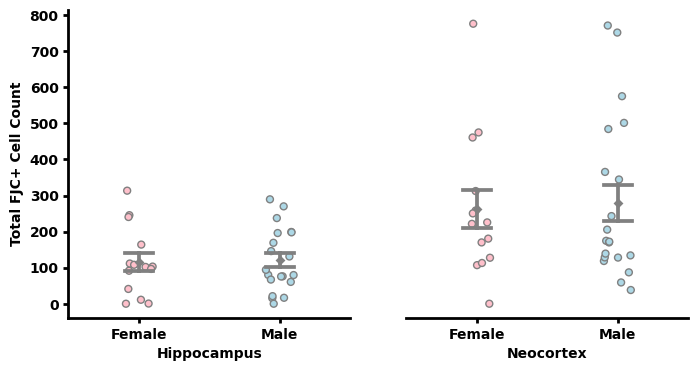

Kruskal-Wallis p-value for WT v. HET v. HO hippocampal FJC+ is 0.044651435990975825
Dunn post-hoc comparisons (Bonferroni corrected):
Hip WT v. Hip HET: p = 0.6792
Hip WT v. Hip HO: p = 0.6266
Hip HET v. Hip HO: p = 0.03806
Kruskal-Wallis p-value for WT v. HET v. HO neocortical FJC+ is 0.066519549443981
Dunn post-hoc comparisons (Bonferroni corrected):
Neo WT v. Neo HET: p = 1
Neo WT v. Neo HO: p = 0.3056
Neo HET v. Neo HO: p = 0.0758


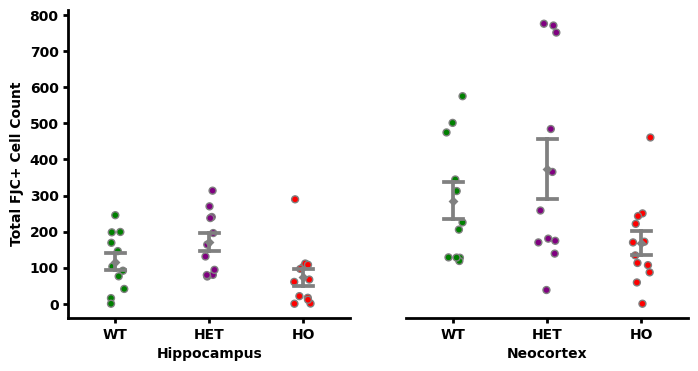

Mann-Whitney U p-value for male v. female SE score is 0.9160151576502498


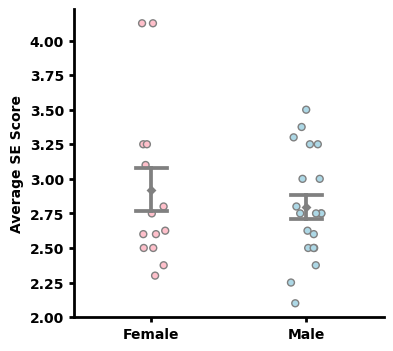

Kruskal–Wallis p-value for WT vs HET vs HO SE score: 0.044651435990975825
Dunn post-hoc comparisons (Bonferroni corrected):
WT v. HET: p = 0.6792
WT v. HO: p = 0.6266
HET v. HO: p = 0.03806


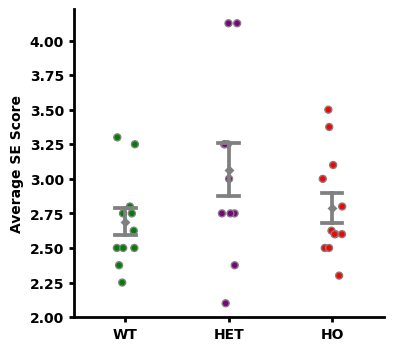

In [ ]:
# Make between-group comparison figures, run stats, and display stats on figures
# Font formatting for figures
mpl.rcParams["font.weight"] = "heavy"
mpl.rcParams["axes.labelweight"] = "heavy"
mpl.rcParams["axes.titleweight"] = "heavy"

#-------------------------------------------------------------------------------

# Between group stats (Mann-Whitney U tests) for figure 1: Effect of sex on hippocampal and neocortical FJC+ cell count
female_hippocampal_fjc = clean_df.loc[clean_df["Sex"] == "Female", "Average Normalized Hippocampal FJC+ Cell Count"]
male_hippocampal_fjc = clean_df.loc[clean_df["Sex"] == "Male", "Average Normalized Hippocampal FJC+ Cell Count"]
sex_hip_fjc_statistic, sex_hip_fjc_p_value = stats.mannwhitneyu(female_hippocampal_fjc, male_hippocampal_fjc, alternative="two-sided")
print("Mann-Whitney U p-value for male v. female hippocampal FJC+ is", sex_hip_fjc_p_value)

female_neocortical_fjc = clean_df.loc[clean_df["Sex"] == "Female", "Average Normalized Neocortical FJC+ Cell Count"]
male_neocortical_fjc = clean_df.loc[clean_df["Sex"] == "Male", "Average Normalized Neocortical FJC+ Cell Count"]
sex_neo_fjc_statistic, sex_neo_fjc_p_value = stats.mannwhitneyu(female_neocortical_fjc, male_neocortical_fjc, alternative="two-sided")
print("Mann-Whitney U p-value for male v. female neocortical FJC+ is", sex_neo_fjc_p_value)

# Plotting functions and formatting for figure 1
fig, ax = plt.subplots(1, 2, sharey=True)
fig.set_size_inches(8, 4)
sns.stripplot(data=clean_df, x="Sex", y="Average Normalized Hippocampal FJC+ Cell Count", hue="Sex", hue_order=["Male", "Female"], palette=["lightblue", "pink"], size=5, edgecolor=".5", linewidth=1, ax=ax[0], zorder=1)
sns.stripplot(data=clean_df, x="Sex", y="Average Normalized Neocortical FJC+ Cell Count", hue="Sex", hue_order=["Male", "Female"], palette=["lightblue", "pink"], size=5, edgecolor=".5", linewidth=1, ax=ax[1], zorder=1)
sns.pointplot(data=clean_df, x="Sex", y="Average Normalized Hippocampal FJC+ Cell Count", errorbar="se", capsize=.2, color=".5", linestyle="none", marker="D", markersize=3, ax=ax[0], zorder=10)
sns.pointplot(data=clean_df, x="Sex", y="Average Normalized Neocortical FJC+ Cell Count", errorbar="se", capsize=.2, color=".5", linestyle="none", marker="D", markersize=3, ax=ax[1], zorder=10)
ax[0].set_xlabel("Hippocampus")
ax[1].set_xlabel("Neocortex")
ax[0].set_ylabel("Average Normalized FJC+ Cell Count")

for a in ax:
    a.spines["top"].set_visible(False)
    a.spines["right"].set_visible(False)
    a.spines["bottom"].set_linewidth(2)

ax[1].spines["left"].set_visible(False)
ax[0].spines["left"].set_linewidth(2)

ax[1].tick_params(axis="y", length=0)
ax[0].tick_params(axis="x", width=2)
ax[1].tick_params(axis="x", width=2)
ax[0].tick_params(axis="y", width=2)

plt.show()

#-------------------------------------------------------------------------------

# Between group stats (Kruskall-Wallis H-tests with post-hoc Dunn's test) for figure 2: Effect of genotype on hippocampal and neocortical FJC+ cell count
wt_hippocampal_fjc = clean_df.loc[clean_df["Genotype"] == "WT", "Average Normalized Hippocampal FJC+ Cell Count"]
het_hippocampal_fjc = clean_df.loc[clean_df["Genotype"] == "HET", "Average Normalized Hippocampal FJC+ Cell Count"]
ho_hippocampal_fjc = clean_df.loc[clean_df["Genotype"] == "HO", "Average Normalized Hippocampal FJC+ Cell Count"]
gt_hip_fjc_statistic, gt_hip_fjc_p_value = stats.kruskal(wt_hippocampal_fjc, het_hippocampal_fjc, ho_hippocampal_fjc)
print("Kruskal-Wallis p-value for WT v. HET v. HO hippocampal FJC+ is", gt_hip_fjc_p_value)

data = pd.concat([wt_hippocampal_fjc, het_hippocampal_fjc, ho_hippocampal_fjc])
groups = ["Hip WT"] * len(wt_hippocampal_fjc) + ["Hip HET"] * len(het_hippocampal_fjc) + ["Hip HO"] * len(ho_hippocampal_fjc)
df_post = pd.DataFrame({"value": data, "group": groups})
posthoc = sp.posthoc_dunn(df_post, val_col="value", group_col="group", p_adjust="bonferroni")
print("Dunn post-hoc comparisons (Bonferroni corrected):")
pairs = [("Hip WT", "Hip HET"), ("Hip WT", "Hip HO"), ("Hip HET", "Hip HO")]
for g1, g2 in pairs:
    print(f"{g1} v. {g2}: p = {posthoc.loc[g1, g2]:.4g}")

wt_neocortical_fjc = clean_df.loc[clean_df["Genotype"] == "WT", "Average Normalized Neocortical FJC+ Cell Count"]
het_neocortical_fjc = clean_df.loc[clean_df["Genotype"] == "HET", "Average Normalized Neocortical FJC+ Cell Count"]
ho_neocortical_fjc = clean_df.loc[clean_df["Genotype"] == "HO", "Average Normalized Neocortical FJC+ Cell Count"]
gt_neo_fjc_statistic, gt_neo_fjc_p_value = stats.kruskal(wt_neocortical_fjc, het_neocortical_fjc, ho_neocortical_fjc)
print("Kruskal-Wallis p-value for WT v. HET v. HO neocortical FJC+ is", gt_neo_fjc_p_value)

data = pd.concat([wt_neocortical_fjc, het_neocortical_fjc, ho_neocortical_fjc])
groups = ["Neo WT"] * len(wt_neocortical_fjc) + ["Neo HET"] * len(het_neocortical_fjc) + ["Neo HO"] * len(ho_neocortical_fjc)
df_post = pd.DataFrame({"value": data, "group": groups})
posthoc = sp.posthoc_dunn(df_post, val_col="value", group_col="group", p_adjust="bonferroni")
print("Dunn post-hoc comparisons (Bonferroni corrected):")
pairs = [("Neo WT", "Neo HET"), ("Neo WT", "Neo HO"), ("Neo HET", "Neo HO")]
for g1, g2 in pairs:
    print(f"{g1} v. {g2}: p = {posthoc.loc[g1, g2]:.4g}")

# Plotting functions and formatting for figure 2
fig, ax1 = plt.subplots(1, 2, sharey=True)
fig.set_size_inches(8, 4)
sns.stripplot(data=clean_df, x="Genotype", y="Average Normalized Hippocampal FJC+ Cell Count", hue="Genotype", hue_order=["WT", "HET", "HO"], palette=["green", "purple", "red"], size=5, edgecolor=".5", linewidth=1, ax=ax1[0], zorder=1)
sns.stripplot(data=clean_df, x="Genotype", y="Average Normalized Neocortical FJC+ Cell Count", hue="Genotype", hue_order=["WT", "HET", "HO"], palette=["green", "purple", "red"], size=5, edgecolor=".5", linewidth=1, ax=ax1[1], zorder=1)
sns.pointplot(data=clean_df, x="Genotype", y="Average Normalized Hippocampal FJC+ Cell Count", errorbar="se", capsize=.2, color=".5", linestyle="none", marker="D", markersize=3, ax=ax1[0], zorder=10)
sns.pointplot(data=clean_df, x="Genotype", y="Average Normalized Neocortical FJC+ Cell Count", errorbar="se", capsize=.2, color=".5", linestyle="none", marker="D", markersize=3, ax=ax1[1], zorder=10)
ax1[0].set_xlabel("Hippocampus")
ax1[1].set_xlabel("Neocortex")
ax1[0].set_ylabel("Average Normalized FJC+ Cell Count")

for a in ax1:
    a.spines["top"].set_visible(False)
    a.spines["right"].set_visible(False)
    a.spines["bottom"].set_linewidth(2)

ax1[1].spines["left"].set_visible(False)
ax1[0].spines["left"].set_linewidth(2)

ax1[1].tick_params(axis="y", length=0)
ax1[0].tick_params(axis="x", width=2)
ax1[1].tick_params(axis="x", width=2)
ax1[0].tick_params(axis="y", width=2)

plt.show()

#-------------------------------------------------------------------------------

# Between group stats (Mann-Whitney U tests) for figure 3: Effect of sex on average status epilepticus score
female_se = clean_df.loc[clean_df["Sex"] == "Female", "Average Status Epilepticus Score"]
male_se = clean_df.loc[clean_df["Sex"] == "Male", "Average Status Epilepticus Score"]
sex_se_statistic, sex_se_p_value = stats.mannwhitneyu(female_se, male_se, alternative="two-sided")
print("Mann-Whitney U p-value for male v. female SE score is", sex_se_p_value)

# Plotting functions and formatting for figure 3
fig, ax2 = plt.subplots()
fig.set_size_inches(4, 4)
sns.stripplot(data=clean_df, x="Sex", y="Average Status Epilepticus Score", hue="Sex", hue_order=["Male", "Female"], palette=["lightblue", "pink"], size=5, edgecolor=".5", linewidth=1, ax=ax2, zorder=1)
sns.pointplot(data=clean_df, x="Sex", y="Average Status Epilepticus Score", errorbar="se", capsize=.2, color=".5", linestyle="none", marker="D", markersize=3, ax=ax2, zorder=10)
ax2.set_xlabel("")
ax2.set_ylabel("Average SE Score")

ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)
ax2.spines["bottom"].set_linewidth(2)
ax2.spines["left"].set_linewidth(2)
ax2.tick_params(axis="x", width=2)
ax2.tick_params(axis="y", width=2)

plt.show()

#-------------------------------------------------------------------------------

# Between group stats (Kruskall-Wallis H-tests with post-hoc Dunn's test) for figure 4: Effect of genotype on average status epilepticus score
wt_se = clean_df.loc[clean_df["Genotype"] == "WT", "Average Normalized Hippocampal FJC+ Cell Count"]
het_se = clean_df.loc[clean_df["Genotype"] == "HET", "Average Normalized Hippocampal FJC+ Cell Count"]
ho_se = clean_df.loc[clean_df["Genotype"] == "HO", "Average Normalized Hippocampal FJC+ Cell Count"]
gt_se_stat, gt_se_p = stats.kruskal(wt_se, het_se, ho_se)
print("Kruskal–Wallis p-value for WT vs HET vs HO SE score:", gt_se_p)

data = pd.concat([wt_se, het_se, ho_se])
groups = ["WT"] * len(wt_se) + ["HET"] * len(het_se) + ["HO"] * len(ho_se)
df_post = pd.DataFrame({"value": data, "group": groups})
posthoc = sp.posthoc_dunn(df_post, val_col="value", group_col="group", p_adjust="bonferroni")
print("Dunn post-hoc comparisons (Bonferroni corrected):")
pairs = [("WT", "HET"), ("WT", "HO"), ("HET", "HO")]
for g1, g2 in pairs:
    print(f"{g1} v. {g2}: p = {posthoc.loc[g1, g2]:.4g}")

# Plotting functions and formatting for figure 4
fig, ax3 = plt.subplots()
fig.set_size_inches(4, 4)
sns.stripplot(data=clean_df, x="Genotype", y="Average Status Epilepticus Score", hue="Genotype", hue_order=["WT", "HET", "HO"], palette=["green", "purple", "red"], size=5, edgecolor=".5", linewidth=1, ax=ax3, zorder=1)
sns.pointplot(data=clean_df, x="Genotype", y="Average Status Epilepticus Score", errorbar="se", capsize=.2, color=".5", linestyle="none", marker="D", markersize=3, ax=ax3, zorder=10)
ax3.set_xlabel("")
ax3.set_ylabel("Average SE Score")

ax3.spines["top"].set_visible(False)
ax3.spines["right"].set_visible(False)
ax3.spines["bottom"].set_linewidth(2)
ax3.spines["left"].set_linewidth(2)
ax3.tick_params(axis="x", width=2)
ax3.tick_params(axis="y", width=2)

plt.show()


Total Hippocampal Pearson correlation (rho): 0.224
Male Hippocampal Pearson correlation (rho): 0.096
Female Hippocampal Pearson correlation (rho): 0.354


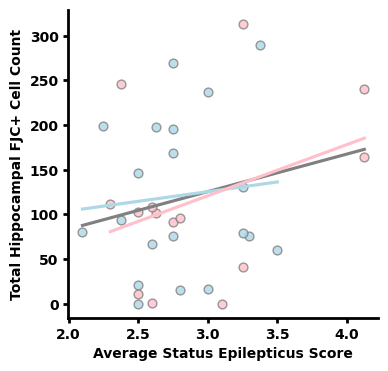

Total Neocortical Pearson correlation (rho): -0.084
Male Neocortical Pearson correlation (rho): -0.348
Female Neocortical Pearson correlation (rho): 0.208


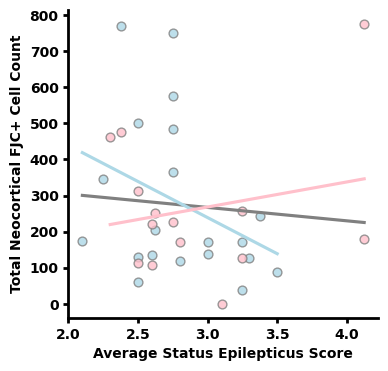

Total Hippocampal Pearson correlation (rho): 0.224
WT Hippocampal Pearson correlation (rho): -0.517
HET Hippocampal Pearson correlation (rho): 0.359
HET Hippocampal Pearson correlation (rho): 0.306


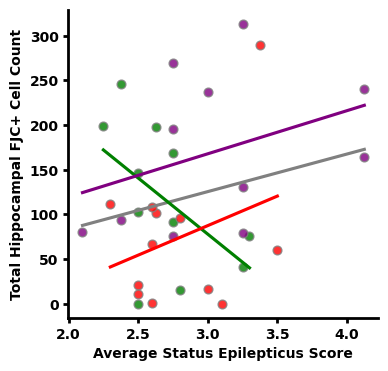

Total Hippocampal Pearson correlation (rho): -0.084
WT Hippocampal Pearson correlation (rho): -0.510
HET Hippocampal Pearson correlation (rho): -0.066
HET Hippocampal Pearson correlation (rho): -0.341


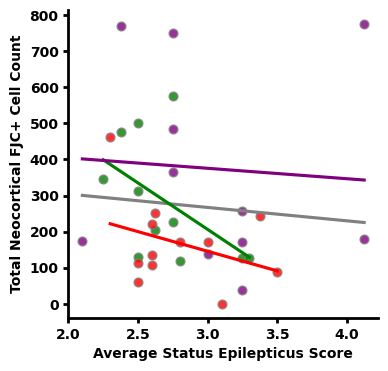

In [ ]:
# Make correlation figures, run stats, and display stats on figures
# Font formatting for figures
mpl.rcParams["font.weight"] = "heavy"
mpl.rcParams["axes.labelweight"] = "heavy"
mpl.rcParams["axes.titleweight"] = "heavy"

# Splitting data into subsets for sex
male_df = clean_df.loc[clean_df["Sex"] == "Male"]
female_df = clean_df.loc[clean_df["Sex"] == "Female"]

#-------------------------------------------------------------------------------

# Correlation stats (Pearson correlation coefficient) for figure 5: Scatterplots, simple linear regression, and correlation of hippocampal FJC+ and average SE score for Average Normalized sample, male animals, and female animals
hip_rho, hip_p_value = stats.pearsonr(clean_df["Average Status Epilepticus Score"], clean_df["Average Normalized Hippocampal FJC+ Cell Count"])
print(f"Average Normalized Hippocampal Pearson correlation (rho): {hip_rho:.3f}")

male_hip_rho, male_hip_p_value = stats.pearsonr(male_df["Average Status Epilepticus Score"], male_df["Average Normalized Hippocampal FJC+ Cell Count"])
print(f"Male Hippocampal Pearson correlation (rho): {male_hip_rho:.3f}")

female_hip_rho, female_hip_p_value = stats.pearsonr(female_df["Average Status Epilepticus Score"], female_df["Average Normalized Hippocampal FJC+ Cell Count"])
print(f"Female Hippocampal Pearson correlation (rho): {female_hip_rho:.3f}")

# Plotting functions and formatting for figure 5
fig, ax = plt.subplots()
fig.set_size_inches(4, 4)
sns.regplot(data=clean_df, x="Average Status Epilepticus Score", y="Average Normalized Hippocampal FJC+ Cell Count", ci=None, color=".5", scatter_kws={"s": 0}, ax=ax)
sns.regplot(data=male_df, x="Average Status Epilepticus Score", y="Average Normalized Hippocampal FJC+ Cell Count", ci=None, color="lightblue", scatter_kws={"s": 40, "edgecolors": ".5", "linewidths": 1}, ax=ax)
sns.regplot(data=female_df, x="Average Status Epilepticus Score", y="Average Normalized Hippocampal FJC+ Cell Count", ci=None, color="pink", scatter_kws={"s": 40, "edgecolors": ".5", "linewidths": 1}, ax=ax)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_linewidth(2)
ax.spines["left"].set_linewidth(2)

ax.tick_params(axis="x", width=2)
ax.tick_params(axis="y", width=2)

plt.show()

#-------------------------------------------------------------------------------

# Correlation stats (Pearson correlation coefficient) for figure 6: Scatterplots, simple linear regression, and correlation of neocortical FJC+ and average SE score for Average Normalized sample, male animals, and female animals
neo_rho, neo_p_value = stats.pearsonr(clean_df["Average Status Epilepticus Score"], clean_df["Average Normalized Neocortical FJC+ Cell Count"])
print(f"Average Normalized Neocortical Pearson correlation (rho): {neo_rho:.3f}")

male_neo_rho, male_neo_p_value = stats.pearsonr(male_df["Average Status Epilepticus Score"], male_df["Average Normalized Neocortical FJC+ Cell Count"])
print(f"Male Neocortical Pearson correlation (rho): {male_neo_rho:.3f}")

female_neo_rho, female_neo_p_value = stats.pearsonr(female_df["Average Status Epilepticus Score"], female_df["Average Normalized Neocortical FJC+ Cell Count"])
print(f"Female Neocortical Pearson correlation (rho): {female_neo_rho:.3f}")

# Plotting functions and formatting for figure 6
fig, ax = plt.subplots()
fig.set_size_inches(4, 4)
sns.regplot(data=clean_df, x="Average Status Epilepticus Score", y="Average Normalized Neocortical FJC+ Cell Count", ci=None, color=".5", scatter_kws={"s": 0}, ax=ax)
sns.regplot(data=male_df, x="Average Status Epilepticus Score", y="Average Normalized Neocortical FJC+ Cell Count", ci=None, color="lightblue", scatter_kws={"s": 40, "edgecolors": ".5", "linewidths": 1}, ax=ax)
sns.regplot(data=female_df, x="Average Status Epilepticus Score", y="Average Normalized Neocortical FJC+ Cell Count", ci=None, color="pink", scatter_kws={"s": 40, "edgecolors": ".5", "linewidths": 1}, ax=ax)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_linewidth(2)
ax.spines["left"].set_linewidth(2)

ax.tick_params(axis="x", width=2)
ax.tick_params(axis="y", width=2)

plt.show()

#-------------------------------------------------------------------------------

# Splitting data into subsets for genotype
wt_df = clean_df.loc[clean_df["Genotype"] == "WT"]
het_df = clean_df.loc[clean_df["Genotype"] == "HET"]
ho_df = clean_df.loc[clean_df["Genotype"] == "HO"]

#-------------------------------------------------------------------------------

# Correlation stats (Pearson correlation coefficient) for figure 7: Scatterplots, simple linear regression, and correlation of hippocampal FJC+ and average SE score for Average Normalized sample, WT animals, HET animals and HO animals
hip_rho, hip_p_value = stats.pearsonr(clean_df["Average Status Epilepticus Score"], clean_df["Average Normalized Hippocampal FJC+ Cell Count"])
print(f"Average Normalized Hippocampal Pearson correlation (rho): {hip_rho:.3f}")

wt_hip_rho, wt_hip_p_value = stats.pearsonr(wt_df["Average Status Epilepticus Score"], wt_df["Average Normalized Hippocampal FJC+ Cell Count"])
print(f"WT Hippocampal Pearson correlation (rho): {wt_hip_rho:.3f}")

het_hip_rho, het_hip_p_value = stats.pearsonr(het_df["Average Status Epilepticus Score"], het_df["Average Normalized Hippocampal FJC+ Cell Count"])
print(f"HET Hippocampal Pearson correlation (rho): {het_hip_rho:.3f}")

ho_hip_rho, ho_hip_p_value = stats.pearsonr(ho_df["Average Status Epilepticus Score"], ho_df["Average Normalized Hippocampal FJC+ Cell Count"])
print(f"HET Hippocampal Pearson correlation (rho): {ho_hip_rho:.3f}")

# Plotting functions and formatting for figure 7
fig, ax = plt.subplots()
fig.set_size_inches(4, 4)
sns.regplot(data=clean_df, x="Average Status Epilepticus Score", y="Average Normalized Hippocampal FJC+ Cell Count", ci=None, color=".5", scatter_kws={"s": 0}, ax=ax)
sns.regplot(data=wt_df, x="Average Status Epilepticus Score", y="Average Normalized Hippocampal FJC+ Cell Count", ci=None, color="green", scatter_kws={"s": 40, "edgecolors": ".5", "linewidths": 1}, ax=ax)
sns.regplot(data=het_df, x="Average Status Epilepticus Score", y="Average Normalized Hippocampal FJC+ Cell Count", ci=None, color="purple", scatter_kws={"s": 40, "edgecolors": ".5", "linewidths": 1}, ax=ax)
sns.regplot(data=ho_df, x="Average Status Epilepticus Score", y="Average Normalized Hippocampal FJC+ Cell Count", ci=None, color="red", scatter_kws={"s": 40, "edgecolors": ".5", "linewidths": 1}, ax=ax)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_linewidth(2)
ax.spines["left"].set_linewidth(2)

ax.tick_params(axis="x", width=2)
ax.tick_params(axis="y", width=2)

plt.show()

#-------------------------------------------------------------------------------

# Correlation stats (Pearson correlation coefficient) for figure 8: Scatterplots, simple linear regression, and correlation of neocortical FJC+ and average SE score for Average Normalized sample, WT animals, HET animals and HO animals
neo_rho, neo_p_value = stats.pearsonr(clean_df["Average Status Epilepticus Score"], clean_df["Average Normalized Neocortical FJC+ Cell Count"])
print(f"Average Normalized Hippocampal Pearson correlation (rho): {neo_rho:.3f}")

wt_neo_rho, wt_neo_p_value = stats.pearsonr(wt_df["Average Status Epilepticus Score"], wt_df["Average Normalized Neocortical FJC+ Cell Count"])
print(f"WT Hippocampal Pearson correlation (rho): {wt_neo_rho:.3f}")

het_neo_rho, het_neo_p_value = stats.pearsonr(het_df["Average Status Epilepticus Score"], het_df["Average Normalized Neocortical FJC+ Cell Count"])
print(f"HET Hippocampal Pearson correlation (rho): {het_neo_rho:.3f}")

ho_neo_rho, ho_neo_p_value = stats.pearsonr(ho_df["Average Status Epilepticus Score"], ho_df["Average Normalized Neocortical FJC+ Cell Count"])
print(f"HET Hippocampal Pearson correlation (rho): {ho_neo_rho:.3f}")

# Plotting functions and formatting for figure 8
fig, ax = plt.subplots()
fig.set_size_inches(4, 4)
sns.regplot(data=clean_df, x="Average Status Epilepticus Score", y="Average Normalized Neocortical FJC+ Cell Count", ci=None, color=".5", scatter_kws={"s": 0}, ax=ax)
sns.regplot(data=wt_df, x="Average Status Epilepticus Score", y="Average Normalized Neocortical FJC+ Cell Count", ci=None, color="green", scatter_kws={"s": 40, "edgecolors": ".5", "linewidths": 1}, ax=ax)
sns.regplot(data=het_df, x="Average Status Epilepticus Score", y="Average Normalized Neocortical FJC+ Cell Count", ci=None, color="purple", scatter_kws={"s": 40, "edgecolors": ".5", "linewidths": 1}, ax=ax)
sns.regplot(data=ho_df, x="Average Status Epilepticus Score", y="Average Normalized Neocortical FJC+ Cell Count", ci=None, color="red", scatter_kws={"s": 40, "edgecolors": ".5", "linewidths": 1}, ax=ax)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_linewidth(2)
ax.spines["left"].set_linewidth(2)

ax.tick_params(axis="x", width=2)
ax.tick_params(axis="y", width=2)

plt.show()

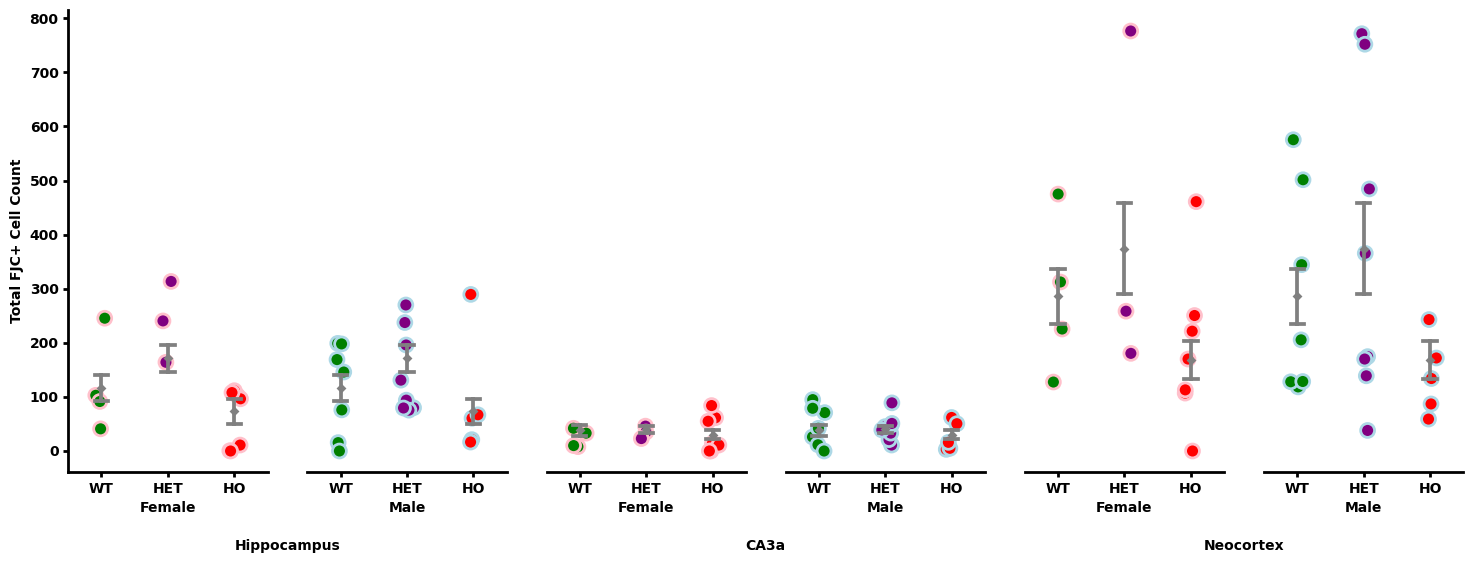

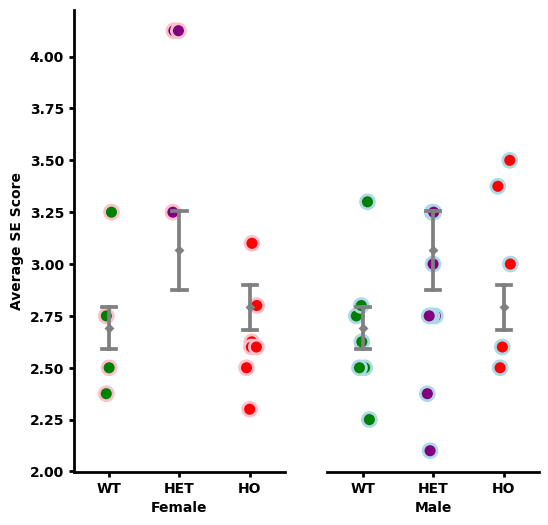

In [ ]:
# Make between-group comparison figures, run stats, and display stats on figures
# Font formatting for figures
mpl.rcParams["font.weight"] = "heavy"
mpl.rcParams["axes.labelweight"] = "heavy"
mpl.rcParams["axes.titleweight"] = "heavy"

#-------------------------------------------------------------------------------

# Plotting functions and formatting for figure 9
fig, ax1 = plt.subplots(1, 6, sharey=True)
fig.set_size_inches(18, 6)
sns.stripplot(data=clean_df[clean_df["Sex"] == "Female"], x="Genotype", y="Average Normalized Hippocampal FJC+ Cell Count", hue="Genotype", hue_order=["WT", "HET", "HO"], palette=["green", "purple", "red"], size=10, edgecolor="pink", linewidth=2, ax=ax1[0], legend=False, zorder=1)
sns.stripplot(data=clean_df[clean_df["Sex"] == "Male"], x="Genotype", y="Average Normalized Hippocampal FJC+ Cell Count", hue="Genotype", hue_order=["WT", "HET", "HO"], palette=["green", "purple", "red"], size=10, edgecolor="lightblue", linewidth=2, ax=ax1[1], legend=False, zorder=1)
sns.stripplot(data=clean_df[clean_df["Sex"] == "Female"], x="Genotype", y="CA3a FJC+ Cell Count", hue="Genotype", hue_order=["WT", "HET", "HO"], palette=["green", "purple", "red"], size=10, edgecolor="pink", linewidth=2, ax=ax1[2], legend=False, zorder=1)
sns.stripplot(data=clean_df[clean_df["Sex"] == "Male"], x="Genotype", y="CA3a FJC+ Cell Count", hue="Genotype", hue_order=["WT", "HET", "HO"], palette=["green", "purple", "red"], size=10, edgecolor="lightblue", linewidth=2, ax=ax1[3], legend=False, zorder=1)
sns.stripplot(data=clean_df[clean_df["Sex"] == "Female"], x="Genotype", y="Average Normalized Neocortical FJC+ Cell Count", hue="Genotype", hue_order=["WT", "HET", "HO"], palette=["green", "purple", "red"], size=10, edgecolor="pink", linewidth=2, ax=ax1[4], legend=False, zorder=1)
sns.stripplot(data=clean_df[clean_df["Sex"] == "Male"], x="Genotype", y="Average Normalized Neocortical FJC+ Cell Count", hue="Genotype", hue_order=["WT", "HET", "HO"], palette=["green", "purple", "red"], size=10, edgecolor="lightblue", linewidth=2, ax=ax1[5], legend=False, zorder=1)

sns.pointplot(data=clean_df, x="Genotype", y="Average Normalized Hippocampal FJC+ Cell Count", hue="Genotype", errorbar="se", capsize=.2, palette=[".5", ".5", ".5"], linestyle="none", marker="D", markersize=3, ax=ax1[0], legend=False, zorder=10)
sns.pointplot(data=clean_df, x="Genotype", y="Average Normalized Hippocampal FJC+ Cell Count", hue="Genotype", errorbar="se", capsize=.2, palette=[".5", ".5", ".5"], linestyle="none", marker="D", markersize=3, ax=ax1[1], legend=False, zorder=10)
sns.pointplot(data=clean_df, x="Genotype", y="CA3a FJC+ Cell Count", hue="Genotype", errorbar="se", capsize=.2, palette=[".5", ".5", ".5"], linestyle="none", marker="D", markersize=3, ax=ax1[2], legend=False, zorder=10)
sns.pointplot(data=clean_df, x="Genotype", y="CA3a FJC+ Cell Count", hue="Genotype", errorbar="se", capsize=.2, palette=[".5", ".5", ".5"], linestyle="none", marker="D", markersize=3, ax=ax1[3], legend=False, zorder=10)
sns.pointplot(data=clean_df, x="Genotype", y="Average Normalized Neocortical FJC+ Cell Count", hue="Genotype", errorbar="se", capsize=.2, palette=[".5", ".5", ".5"], linestyle="none", marker="D", markersize=3, ax=ax1[4], legend=False, zorder=10)
sns.pointplot(data=clean_df, x="Genotype", y="Average Normalized Neocortical FJC+ Cell Count", hue="Genotype", errorbar="se", capsize=.2, palette=[".5", ".5", ".5"], linestyle="none", marker="D", markersize=3, ax=ax1[5], legend=False, zorder=10)

ax1[0].set_xlabel("Female")
ax1[1].set_xlabel("Male")
ax1[2].set_xlabel("Female")
ax1[3].set_xlabel("Male")
ax1[4].set_xlabel("Female")
ax1[5].set_xlabel("Male")
ax1[0].set_ylabel("Average Normalized FJC+ Cell Count")

for a in ax1:
    a.spines["top"].set_visible(False)
    a.spines["right"].set_visible(False)
    a.spines["bottom"].set_linewidth(2)

ax1[1].spines["left"].set_visible(False)
ax1[2].spines["left"].set_visible(False)
ax1[3].spines["left"].set_visible(False)
ax1[4].spines["left"].set_visible(False)
ax1[5].spines["left"].set_visible(False)
ax1[0].spines["left"].set_linewidth(2)

ax1[1].tick_params(axis="y", length=0)
ax1[2].tick_params(axis="y", length=0)
ax1[3].tick_params(axis="y", length=0)
ax1[4].tick_params(axis="y", length=0)
ax1[5].tick_params(axis="y", length=0)
ax1[0].tick_params(axis="x", width=2)

ax1[1].tick_params(axis="x", width=2)
ax1[2].tick_params(axis="x", width=2)
ax1[3].tick_params(axis="x", width=2)
ax1[4].tick_params(axis="x", width=2)
ax1[5].tick_params(axis="x", width=2)
ax1[0].tick_params(axis="y", width=2)

y_loc = -0.025

pos1 = ax1[0].get_position()
pos2 = ax1[1].get_position()
x_mid = (pos1.x0 + pos1.x1 + pos2.x0 + pos2.x1) / 4
fig.text(x_mid, y_loc, "Hippocampus", ha='center', va='bottom')

pos3 = ax1[2].get_position()
pos4 = ax1[3].get_position()
x_mid = (pos3.x0 + pos3.x1 + pos4.x0 + pos4.x1) / 4
fig.text(x_mid, y_loc, "CA3a", ha='center', va='bottom')

pos5 = ax1[4].get_position()
pos6 = ax1[5].get_position()
x_mid = (pos5.x0 + pos5.x1 + pos6.x0 + pos6.x1) / 4
fig.text(x_mid, y_loc, "Neocortex", ha='center', va='bottom')

plt.show()

#-------------------------------------------------------------------------------

# Plotting functions and formatting for figure 10
fig, ax2 = plt.subplots(1, 2, sharey=True)
fig.set_size_inches(6, 6)
sns.stripplot(data=clean_df[clean_df["Sex"] == "Female"], x="Genotype", y="Average Status Epilepticus Score", hue="Genotype", hue_order=["WT", "HET", "HO"], palette=["green", "purple", "red"], size=10, edgecolor="pink", linewidth=2, ax=ax2[0], legend=False, zorder=1)
sns.stripplot(data=clean_df[clean_df["Sex"] == "Male"], x="Genotype", y="Average Status Epilepticus Score", hue="Genotype", hue_order=["WT", "HET", "HO"], palette=["green", "purple", "red"], size=10, edgecolor="lightblue", linewidth=2, ax=ax2[1], legend=False, zorder=1)

sns.pointplot(data=clean_df, x="Genotype", y="Average Status Epilepticus Score", hue="Genotype", errorbar="se", capsize=.2, palette=[".5", ".5", ".5"], linestyle="none", marker="D", markersize=3, ax=ax2[0], legend=False, zorder=10)
sns.pointplot(data=clean_df, x="Genotype", y="Average Status Epilepticus Score", hue="Genotype", errorbar="se", capsize=.2, palette=[".5", ".5", ".5"], linestyle="none", marker="D", markersize=3, ax=ax2[1], legend=False, zorder=10)

ax2[0].set_xlabel("Female")
ax2[1].set_xlabel("Male")
ax2[0].set_ylabel("Average SE Score")

for a in ax2:
    a.spines["top"].set_visible(False)
    a.spines["right"].set_visible(False)
    a.spines["bottom"].set_linewidth(2)

ax2[1].spines["left"].set_visible(False)
ax2[0].spines["left"].set_linewidth(2)

ax2[1].tick_params(axis="y", length=0)
ax2[0].tick_params(axis="x", width=2)

ax2[1].tick_params(axis="x", width=2)
ax2[0].tick_params(axis="y", width=2)

plt.show()

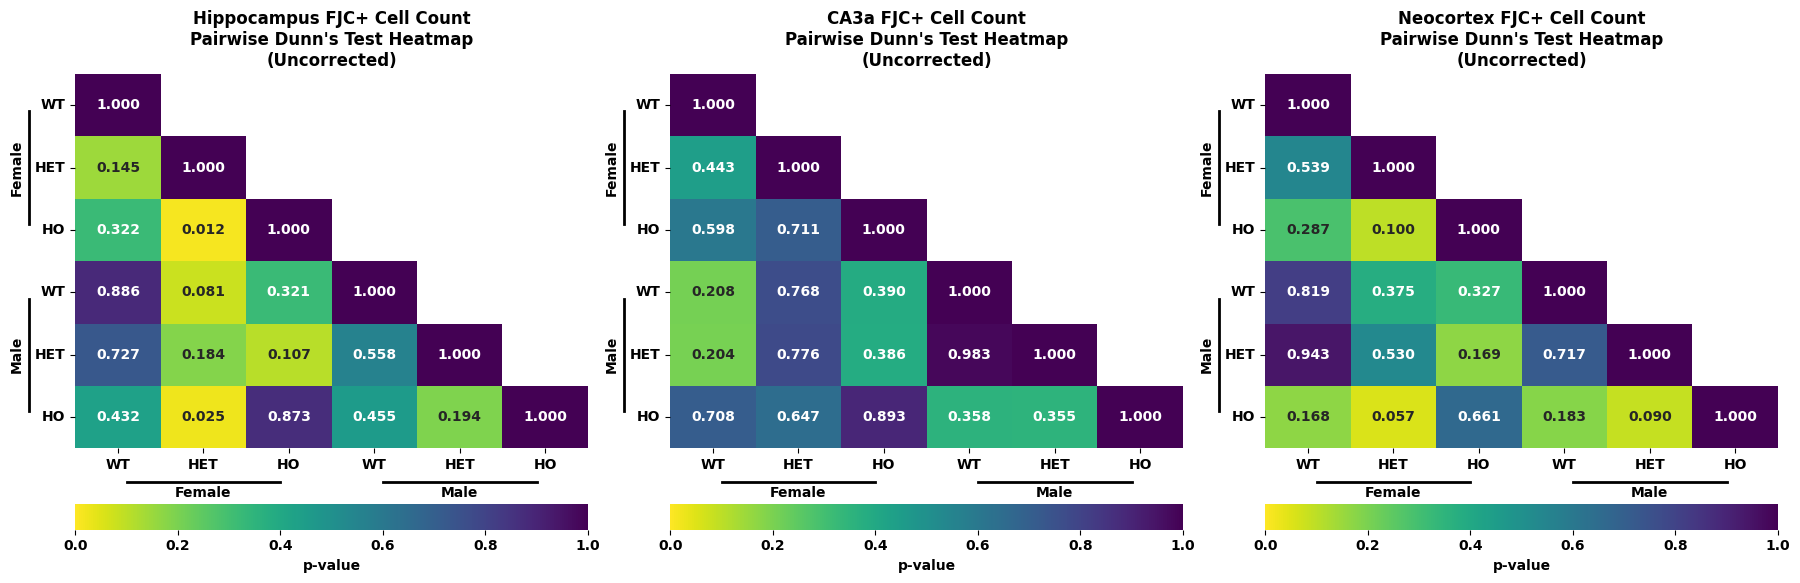

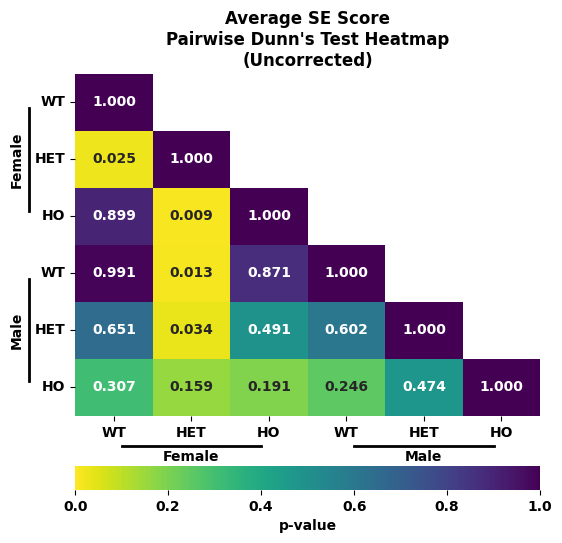

In [ ]:
clean_df = clean_df.copy()
clean_df["Group"] = clean_df["Sex"].astype(str) + "_" + clean_df["Genotype"].astype(str)
group_order = ["Female_WT", "Female_HET", "Female_HO", "Male_WT", "Male_HET", "Male_HO"]
clean_df["Group"] = pd.Categorical(clean_df["Group"], categories=group_order, ordered=True)

hip_pvals = sp.posthoc_dunn(clean_df, val_col="Average Normalized Hippocampal FJC+ Cell Count", group_col="Group")
ca3a_pvals = sp.posthoc_dunn(clean_df, val_col="CA3a FJC+ Cell Count", group_col="Group")
neo_pvals = sp.posthoc_dunn(clean_df, val_col="Average Normalized Neocortical FJC+ Cell Count", group_col="Group")
pvals = [hip_pvals, ca3a_pvals, neo_pvals]

hip_mask = np.triu(np.ones_like(hip_pvals, dtype=bool), k=1)
ca3a_mask = np.triu(np.ones_like(ca3a_pvals, dtype=bool), k=1)
neo_mask = np.triu(np.ones_like(neo_pvals, dtype=bool), k=1)
masks = [hip_mask, ca3a_mask, neo_mask]

titles = ["Hippocampus", "CA3a", "Neocortex"]

fig, axes = plt.subplots(1, 3, figsize=(18,6))

for ax, mask, pval, title in zip(axes, masks, pvals, titles):
    sns.heatmap(pval, annot=True, fmt=".3f", cmap="viridis_r", mask=mask,
                vmin=0, vmax=1, cbar_kws={"orientation":"horizontal","pad":0.11,"label":"p-value"}, ax=ax)
    ax.set_xticklabels(["WT","HET","HO","WT","HET","HO"], rotation=0)
    ax.set_yticklabels(["WT","HET","HO","WT","HET","HO"], rotation=0)
    ax.set_title(title + " FJC+ Cell Count" + "\n" + "Pairwise Dunn's Test Heatmap\n(Uncorrected)")

    # Y-axis annotations
    ax.annotate("Male", xy=(-0.1, 0.25), xycoords="axes fraction", rotation=90, ha="right", va="center", clip_on=False)
    ax.annotate("Female", xy=(-0.1, 0.75), xycoords="axes fraction", rotation=90, ha="right", va="center", clip_on=False)

    # X-axis annotations
    ax.annotate("Female", xy=(0.25, -0.1), xycoords="axes fraction", rotation=0, ha="center", va="top", clip_on=False)
    ax.annotate("Male", xy=(0.75, -0.1), xycoords="axes fraction", rotation=0, ha="center", va="top", clip_on=False)

    # Line length
    line_length = 0.3

    # Horizontal lines for x-axis annotations
    ax.plot([0.25 - line_length/2, 0.25 + line_length/2], [-0.09, -0.09], transform=ax.transAxes, color="black", lw=2, clip_on=False)
    ax.plot([0.75 - line_length/2, 0.75 + line_length/2], [-0.09, -0.09], transform=ax.transAxes, color="black", lw=2, clip_on=False)

    # Vertical lines for y-axis annotations
    ax.plot([-0.09, -0.09], [0.25 - line_length/2, 0.25 + line_length/2], transform=ax.transAxes, color="black", lw=2, clip_on=False)
    ax.plot([-0.09, -0.09], [0.75 - line_length/2, 0.75 + line_length/2], transform=ax.transAxes, color="black", lw=2, clip_on=False)

plt.tight_layout()
plt.show()

#-------------------------------------------------------------------------------
se_pvals = sp.posthoc_dunn(clean_df, val_col="Average Status Epilepticus Score", group_col="Group")
fig, ax = plt.subplots(1, 1, figsize=(6,6))

sns.heatmap(se_pvals, annot=True, fmt=".3f", cmap="viridis_r", mask=mask, vmin=0, vmax=1, cbar_kws={"orientation":"horizontal","pad":0.11,"label":"p-value"}, ax=ax)
ax.set_xticklabels(["WT","HET","HO","WT","HET","HO"], rotation=0)
ax.set_yticklabels(["WT","HET","HO","WT","HET","HO"], rotation=0)
ax.set_title("Average SE Score" + "\n" + "Pairwise Dunn's Test Heatmap\n(Uncorrected)")

# Y-axis annotations
ax.annotate("Male", xy=(-0.11, 0.25), xycoords="axes fraction", rotation=90, ha="right", va="center", clip_on=False)
ax.annotate("Female", xy=(-0.11, 0.75), xycoords="axes fraction", rotation=90, ha="right", va="center", clip_on=False)

# X-axis annotations
ax.annotate("Female", xy=(0.25, -0.1), xycoords="axes fraction", rotation=0, ha="center", va="top", clip_on=False)
ax.annotate("Male", xy=(0.75, -0.1), xycoords="axes fraction", rotation=0, ha="center", va="top", clip_on=False)

# Line length
line_length = 0.3

# Horizontal lines for x-axis annotations
ax.plot([0.25 - line_length/2, 0.25 + line_length/2], [-0.09, -0.09], transform=ax.transAxes, color="black", lw=2, clip_on=False)
ax.plot([0.75 - line_length/2, 0.75 + line_length/2], [-0.09, -0.09], transform=ax.transAxes, color="black", lw=2, clip_on=False)

# Vertical lines for y-axis annotations
ax.plot([-0.1, -0.1], [0.25 - line_length/2, 0.25 + line_length/2], transform=ax.transAxes, color="black", lw=2, clip_on=False)
ax.plot([-0.1, -0.1], [0.75 - line_length/2, 0.75 + line_length/2], transform=ax.transAxes, color="black", lw=2, clip_on=False)